Managing Smile Risk Patrick S. Hagan*, Deep Kumar† , Andrew S. Lesniewski‡ ,
and Diana E. Woodward

http://lesniewski.us/papers/published/ManagingSmileRisk.pdf

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr
from datetime import datetime
import random
import math
import scipy.stats as scs
from math import sqrt,exp
import QuantLib as ql

plt.rcParams["figure.figsize"] = (10,6)
plt.style.use("seaborn")

C:\Users\chiehlinchen\AppData\Local\Temp\ipykernel_17168\3873532640.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [4]:
K = 106
F = 120
T = 17/365
sigma = 1.63
beta = 0.6
v = 3.3
rho = 0.00002
ql.sabrVolatility(K, F, T, sigma, beta, v, rho)

0.33284656705268817

In [5]:
def SABR(K,F,T,sigma,beta,v,rho):
    return ql.sabrVolatility(K, F, T, sigma, beta, v, rho)

In [6]:
vol_imp = np.zeros((7,21))

for j in range(-75, 100, 25):
    for i in range(100, 141, 2):
        vol_imp[int((j+75)/25), int((i-100)/2)] = ql.sabrVolatility(i,F,T,sigma,beta,v,j/100)

In [7]:
vol= pd.DataFrame(vol_imp,index = range(-75, 100, 25),columns = range(100,141,2))
vol

,100,102,104,106,108,110,112,114,116,118,...,122,124,126,128,130,132,134,136,138,140
-75,0.465012,0.442394,0.419850,0.397353,0.374877,0.352400,0.329907,0.307405,0.284937,0.262626,...,0.219962,0.201441,0.187083,0.178618,0.176130,0.178140,0.182979,0.189466,0.196889,0.204830
-50,0.446461,0.424780,0.403280,0.381965,0.360854,0.339992,0.319463,0.299418,0.280123,0.262027,...,0.232627,0.223482,0.219100,0.219249,0.222972,0.229163,0.236934,0.245668,0.254966,0.264573
-25,0.420905,0.400469,0.380334,0.360546,0.341183,0.322372,0.304320,0.287353,0.271973,0.258903,...,0.243213,0.241777,0.244365,0.250113,0.258068,0.267451,0.277708,0.288465,0.299482,0.310600
0,0.388124,0.369228,0.350771,0.332849,0.315617,0.299314,0.284305,0.271129,0.260524,0.253351,...,0.251625,0.256760,0.264816,0.274857,0.286140,0.298140,0.310515,0.323041,0.335578,0.348035
25,0.347456,0.330387,0.313910,0.298192,0.283493,0.270211,0.258935,0.250471,0.245742,0.245465,...,0.257764,0.268567,0.281104,0.294625,0.308634,0.322819,0.336991,0.351034,0.364881,0.378492
50,0.297124,0.282173,0.267976,0.254803,0.243080,0.233471,0.226936,0.224635,0.227459,0.235342,...,0.261531,0.277214,0.293466,0.309842,0.326095,0.342089,0.357757,0.373066,0.388004,0.402574
75,0.231497,0.219013,0.207410,0.197112,0.188865,0.183946,0.184238,0.191423,0.205167,0.223072,...,0.262832,0.282655,0.301960,0.320652,0.338716,0.356167,0.373035,0.389353,0.405155,0.420475


<Axes: >

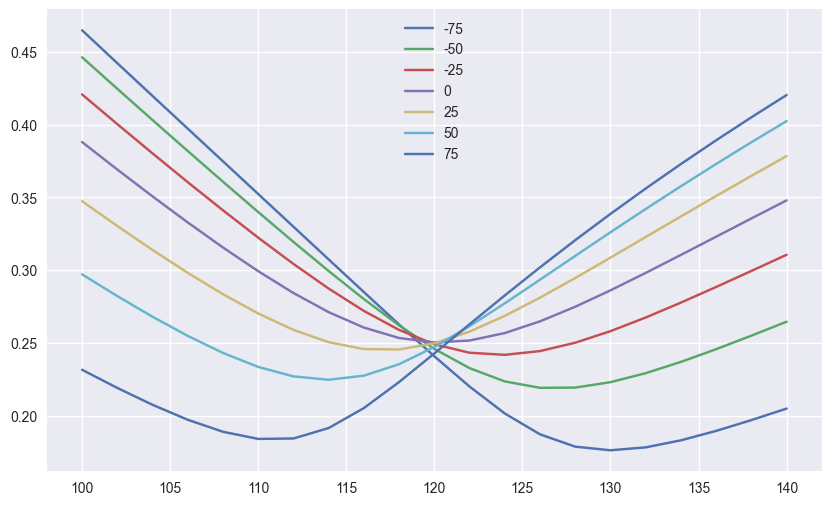

In [8]:
vol.T.plot(figsize=(10,6))